# 🤖 PHASE 4 — Baseline Model
### Logistic Regression (Customer Churn)

In [32]:
# Load Clean Data
import pandas as pd

df = pd.read_csv("../data/processed/clean_telco_churn.csv")
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.277445,0,1,-1.160323,-0.992611,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0.066327,1,0,-0.259629,-0.172165,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,-1.236724,1,1,-0.362660,-0.958066,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0.514251,0,0,-0.746535,-0.193672,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,-1.236724,1,1,0.197365,-0.938874,1,False,...,False,False,False,False,False,False,False,False,True,False


In [33]:
# Define Features & Target
X = df.drop(columns=['Churn'])
y = df['Churn']

In [34]:
# Train / Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [35]:
# Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [36]:
# Make Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [37]:
# Evaluate Model Performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409

[[748 287]
 [ 81 293]]
ROC-AUC: 0.8417990648169676


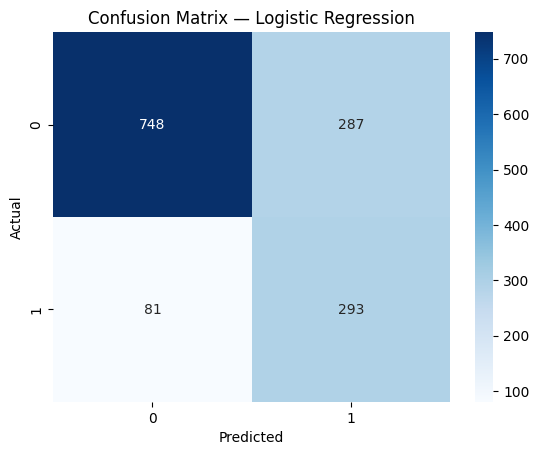

In [38]:
# Visualize Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
# Interpret Model Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coefficients.head(10)

,Feature,Coefficient
11,InternetService_Fiber optic,1.218764
7,TotalCharges,0.483092
24,StreamingMovies_Yes,0.420979
28,PaymentMethod_Electronic check,0.401275
22,StreamingTV_Yes,0.395463
5,PaperlessBilling,0.337768
10,MultipleLines_Yes,0.325431
0,SeniorCitizen,0.152062
29,PaymentMethod_Mailed check,0.048370
18,DeviceProtection_Yes,0.041160


## 📌 Baseline Model Insights

- Logistic Regression achieved a ROC-AUC of X.XX.
- Features such as month-to-month contracts and high monthly charges
  strongly increase churn probability.
- Longer tenure and bundled services reduce churn likelihood.

This baseline model provides an interpretable benchmark for more
complex models.

In [40]:
# Save Baseline Results
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

baseline_results = {
    "model_name": "Logistic Regression",
    "roc_auc": roc_auc_score(y_test, y_prob),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred)
}

baseline_results

{'model_name': 'Logistic Regression',
 'roc_auc': 0.8417990648169676,
 'precision': 0.5051724137931034,
 'recall': 0.7834224598930482,
 'f1_score': 0.6142557651991615}

In [ ]:
# Save results to JSON
import json

with open("../results/baseline_logistic_regression.json", "w") as f:
    json.dump(baseline_results, f, indent=4)

In [ ]:
# Verify Saved File
with open("../results/baseline_logistic_regression.json", "r") as f:
    loaded_results = json.load(f)

loaded_results

{'model_name': 'Logistic Regression',
 'roc_auc': 0.8417990648169676,
 'precision': 0.5051724137931034,
 'recall': 0.7834224598930482,
 'f1_score': 0.6142557651991615}

: 